<a href="https://colab.research.google.com/github/rgalvanmadrid/general/blob/master/CASA_imaging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Script para hacer un ejercicio básico de creación de una imagen en CASA a partir de visibilidades, usando la técnica de deconvolución conocida como "cleaning"** \\
CASA es el software usado para el procesamiento de datos de radiotescopios como ALMA y VLA. Tiene muchas funcionalidades, desde calibración de "visibilidades", hasta la formación, procesamiento y visualización de imágenes. \\
https://casadocs.readthedocs.io/en/stable/ \\
En este pequeño tutorial haremos un ejemplo de formación de imágenes usando la tarea *tclean* \\
https://casadocs.readthedocs.io/en/stable/api/tt/casatasks.imaging.tclean.html

CASA usualmente se corre en servidores de procesamiento pesado tipo "nodo", es decir, sobre múltiples procesadores pero bajo los límites de RAM disponibles. Sin embargo, es posible correr cosas sencillas en la nube, como en Colab. Más info aquí: \\
https://casadocs.readthedocs.io/en/v6.5.2/examples/community/casa6_demo.html

In [ ]:
# Prerequisitos de sistema para instalar en Colab
import os
os.system('apt-get install xvfb')
os.system('pip install pyvirtualdisplay')

from pyvirtualdisplay import Display
display = Display(visible=0,size=(1024,768))
display.start( )

print('completed system setup')

completed system setup


In [ ]:
# Prerequisitos de CASA para instalar en Colab
print("installing casa packages...\n")
os.system("pip install casatasks==6.3.0.48")
os.system("pip install casaviewer==1.2.14")
os.system("pip install casadata")
os.system("pip install casaplotms")


print("downloading MeasurementSet from CASAguide First Look at Imaging...\n")
os.system("wget https://bulk.cv.nrao.edu/almadata/public/working/sis14_twhya_calibrated_flagged.ms.tar")
os.system("tar -xvf sis14_twhya_calibrated_flagged.ms.tar")

print("make a config file for Google Colab...\n")
!mkdir ~/.casa
!echo "home     = '/content/'" > ~/.casa/config.py
!echo "datapath = ['`find / -type d -name casadata`']" >> ~/.casa/config.py
!more ~/.casa/config.py

installing casa packages...

downloading MeasurementSet from CASAguide First Look at Imaging...

make a config file for Google Colab...

mkdir: cannot create directory ‘/root/.casa’: File exists
find: ‘/proc/62/task/62/net’: Invalid argument
find: ‘/proc/62/net’: Invalid argument
home     = '/content/'
datapath = ['/usr/local/lib/python3.10/dist-packages/casadata']


Un radiointerferómetro no mide directamente el brillo en el cielo (imágenes), sino que mide "visibilidaes", las cuales son las componentes de Fourier de la imagen en el cielo, y son números complejos *V(u,v) = A exp(i * phi)* \\
Más info en este mini-curso: \\
Parte 1: \\
https://drive.google.com/file/d/1ZHHuH8N3JbGh2EezqvLYvxkZi1Kg15ud/view?usp=sharing

Parte 2: \\
https://drive.google.com/file/d/1mzmw6UEnKJtUHX_q0zSYnSbXiFMfnLb-/view?usp=sharing

Graficando cobertura (u,v)
Finalizado


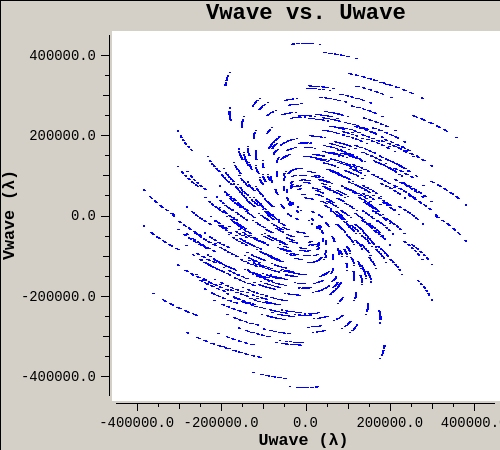

In [33]:
'''
Despleguemos el dominio (u,v) de la visibilidad compleja V(u,v) \\
Noten que de hecho (u,v) corresponde a la apertura sintética, o sea los pedazos
del interferómetro gigante que el arreglo de antenas reproduce.
'''
from casaplotms import plotms
print('Graficando cobertura (u,v)')
plotms(vis='sis14_twhya_calibrated_flagged.ms', field='5', plotfile='uv_sis14_twhya_calibrated_flagged.jpg',
       xaxis='uwave', yaxis='vwave', avgchannel='40', avgtime='30', showgui=False, highres=True,
       width=500, height=450, overwrite=True)
print('Finalizado')

from IPython.display import Image
Image(filename='uv_sis14_twhya_calibrated_flagged.jpg')

Graficando cobertura A vs sqrt(u^2+v^2)
Finalizado


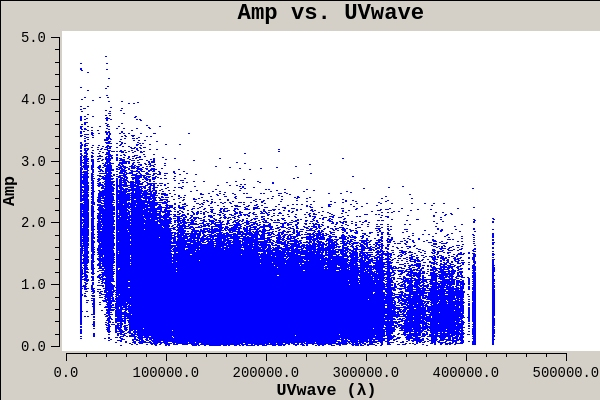

In [34]:
'''
Ahora despleguemos la amplitud A de la visibilidad compleja como función
de la longitud de la línea de base (separación entre antenas), normalizada
a la longitud de onda sqrt(u^2 + v^2)
'''
print('Graficando cobertura A vs sqrt(u^2+v^2)')
plotms(vis='sis14_twhya_calibrated_flagged.ms', field='5', plotfile='Avsbaseline_sis14_twhya_calibrated_flagged.jpg',
       xaxis='uvwave', yaxis='amp', avgchannel='40', avgtime='30', showgui=False, highres=True,
       width=600, height=400, overwrite=True)
print('Finalizado')

from IPython.display import Image
Image(filename='Avsbaseline_sis14_twhya_calibrated_flagged.jpg')

Ahora sigue crear la imagen. En resumen, el proceso consiste en:

*   Hacer una transformada de Fourier discreta (FFT) de las visibilidades. El output de esto es una imagen "sucia" similar a la del laboratorio anterior.
*   Deconvolucionar la imagen sucia del PSF o beam sucio, producto de que la apertura del radiointerferómetro es incompleta.

*   Convolucionar de nuevo a la imagen deconvolucionada, pero por un PSF o beam limpio, es decir, una Gausiana que aproxima al PSF real.
*   Añadir los residuos del proceso anterior, los cuales contienen al ruido característico de la imagen.
Más información en esta presentación del mini-curso:
Parte 3: \\
https://drive.google.com/file/d/1LeCsbcrb9m2IXWawmKKFQF6e9vjFqGhC/view?usp=sharing





In [26]:
'''
El proceso de transformada de Fourier y deconvolución/convolución, que en su
conjunto se llama "CLEANing" (porque el algoritmo original se llama CLEAN) se
hace con la tarea tclean
'''
from casatasks import tclean

print("running tclean, may take a bit...")

tclean(vis='sis14_twhya_calibrated_flagged.ms', imagename='first_image',
       field='5', spw='', specmode='mfs', deconvolver='hogbom', nterms=1,
       gridder='standard', imsize=[250,250], cell=['0.1arcsec'],
       weighting='natural', threshold='0mJy', niter=5000,
       interactive=False, savemodel='modelcolumn')

print("complete")

running tclean, may take a bit...
complete


<ipython-input-35-d9fffd69dfed>:28: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(1, 1, 1, projection=w)


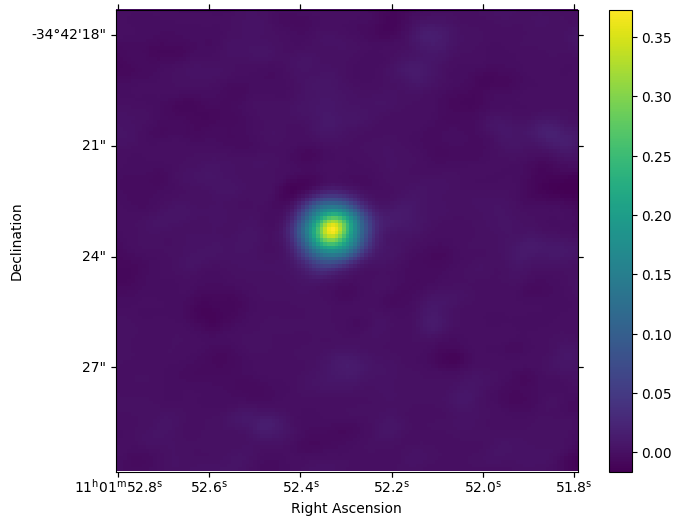

In [35]:
'''
Para visualizar las imágenes hechas hay varias opciones: el visualizador
incluido en CASA (imview), usar puro Python (matplotlib), o visualizadores de
nueva generación que son más rápidos como CARTA:
https://cartavis.org/
Aquí usaremos solo Python.
'''

from casatools import image as IA
from astropy.wcs import WCS
import matplotlib.pyplot as plt
import numpy as np

ia = IA()
ia.open('first_image.image')
pix = ia.getchunk()[:,:,0,0]
csys = ia.coordsys()
ia.close()

rad_to_deg =  180/np.pi
w = WCS(naxis=2)
w.wcs.crpix = csys.referencepixel()['numeric'][0:2]
w.wcs.cdelt = csys.increment()['numeric'][0:2]*rad_to_deg
w.wcs.crval = csys.referencevalue()['numeric'][0:2]*rad_to_deg
w.wcs.ctype = ['RA---SIN', 'DEC--SIN']

plt.subplots(1,1, figsize=(8,6))
ax = plt.subplot(1, 1, 1, projection=w)
p1 = int(pix.shape[0]*0.25)
p2 = int(pix.shape[0]*0.75)

im = ax.imshow(pix[p1:p2,p1:p2].transpose(), origin='lower',  cmap=plt.cm.viridis)
plt.colorbar(im, ax=ax)
ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')

In [28]:
# Otro juego de datos para una imagen más complicada (se tarda más en Colab, pero en mis pruebas sí se puede)
print("Descargando juego de datos (visibilidades) del remanente de supernova G55.7+3.4...\n")
os.system("wget http://casa.nrao.edu/Data/EVLA/SNRG55/SNR_G55_10s.calib.tar.gz")
os.system("tar -xzvf  SNR_G55_10s.calib.tar.gz")

Descargando juego de datos (visibilidades) del remanente de supernova G55.7+3.4...



0

In [ ]:
'''
Despleguemos el dominio (u,v) de la visibilidad compleja V(u,v) \\
Noten que de hecho (u,v) corresponde a la apertura sintética, o sea los pedazos
del interferómetro gigante que el arreglo de antenas reproduce.
'''
from casaplotms import plotms
print('Graficando cobertura (u,v)')
plotms(vis='SNR_G55_10s.calib.ms', plotfile='uv_SNR_G55_10s.calib.jpg',
       xaxis='uwave', yaxis='vwave', avgchannel='64', avgtime='3000', showgui=False, highres=True,
       width=500, height=450, overwrite=True)
print('Finalizado')

from IPython.display import Image
Image(filename='uv_SNR_G55_10s.calib.jpg')

Graficando cobertura A vs sqrt(u^2+v^2)
Finalizado


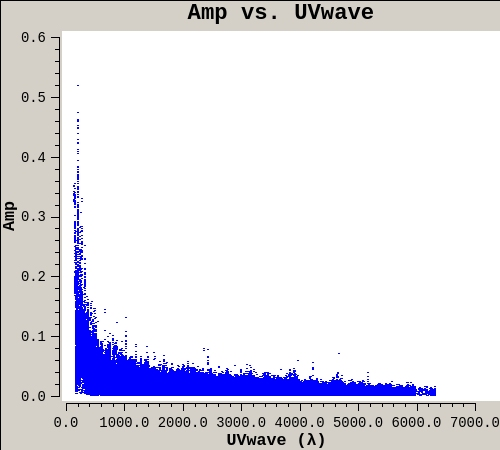

In [37]:
'''
Ahora despleguemos la amplitud A de la visibilidad compleja como función
de la longitud de la línea de base (separación entre antenas), normalizada
a la longitud de onda sqrt(u^2 + v^2)
'''
print('Graficando cobertura A vs sqrt(u^2+v^2)')
plotms(vis='SNR_G55_10s.calib.ms', plotfile='Avsbaseline_SNR_G55_10s.calib.jpg',
       xaxis='uvwave', yaxis='amp', avgchannel='64', avgtime='3000', showgui=False, highres=True,
       width=500, height=450, overwrite=True)
print('Finalizado')

from IPython.display import Image
Image(filename='Avsbaseline_SNR_G55_10s.calib.jpg')

In [ ]:
#Ahora hacemos la imagen del remanente de supernova (en mis pruebas tarda como 10 minutos corriendo).
tclean(vis='SNR_G55_10s.calib.ms', imagename='SNR_G55_10s.briggs', weighting='briggs', robust=0.0,
      imsize=540, cell='8arcsec', pblimit=-0.01, niter=1000, interactive=False, threshold='0.15mJy', savemodel='modelcolumn');


<ipython-input-19-51afe2cb4da3>:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(1, 1, 1, projection=w)


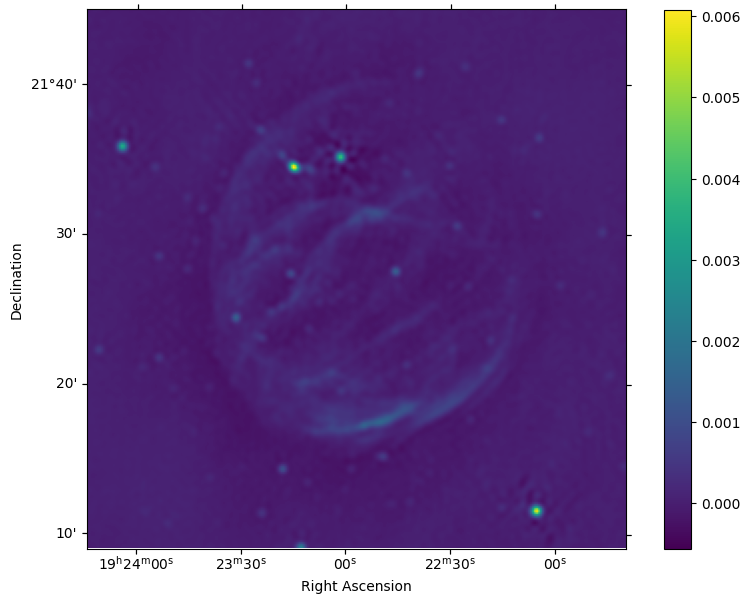

In [ ]:
#Ahora visualizamos la imagen
ia = IA()
ia.open('SNR_G55_10s.briggs.image')
pix = ia.getchunk()[:,:,0,0]
csys = ia.coordsys()
ia.close()

rad_to_deg =  180/np.pi
w = WCS(naxis=2)
w.wcs.crpix = csys.referencepixel()['numeric'][0:2]
w.wcs.cdelt = csys.increment()['numeric'][0:2]*rad_to_deg
w.wcs.crval = csys.referencevalue()['numeric'][0:2]*rad_to_deg
w.wcs.ctype = ['RA---SIN', 'DEC--SIN']

plt.subplots(1,1, figsize=(10,7))
ax = plt.subplot(1, 1, 1, projection=w)
p1 = int(pix.shape[0]*0.25)
p2 = int(pix.shape[0]*0.75)

im = ax.imshow(pix[p1:p2,p1:p2].transpose(), origin='lower',  cmap=plt.cm.viridis)
plt.colorbar(im, ax=ax)
ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')